# Predicting industrial machine downtime 🛠️


## Analysis Report

### Executive Summary
This report provides a comprehensive analysis of machine downtime data across three assembly lines, focusing on identifying operational patterns and potential maintenance needs. The analysis encompasses temporal patterns, torque measurements, and downtime frequencies, with the goal of improving predictive maintenance strategies.

## Methodology

### Data Processing and Time Analysis
We analyzed operational data spanning from November 24, 2021, to June 19, 2022, providing approximately seven months of machine performance insights. This timeframe offers a substantial dataset for understanding seasonal and operational patterns.

### Performance Metrics Analysis
We conducted detailed calculations of torque measurements across all machines, revealing consistent performance patterns with slight variations between units. This analysis helps establish baseline performance metrics for each machine.

### Downtime Pattern Recognition
We performed a thorough examination of downtime incidents across assembly lines, identifying which lines experience the highest frequency of operational interruptions and potential correlations with other operational parameters.

## Key Findings

### 1. Temporal Coverage
- **First Reading Date**: November 24, 2021
- **Last Reading Date**: June 19, 2022
- **Total Monitoring Period**: 207 days

### 2. Torque Analysis

#### Machine-Specific Performance:
- **Makino-L1-Unit1-2013**: 24.94 Nm (average)
- **Makino-L2-Unit1-2015**: 25.12 Nm (average)
- **Makino-L3-Unit1-2015**: 25.54 Nm (average)

#### Overall Performance:
- **Global Average Torque**: 25.20 Nm
- **Variance Between Machines**: Less than 1 Nm, indicating consistent performance across units

### 3. Downtime Analysis by Assembly Line

#### Failure Rates:
- **Assembly Line 1 (Makino-L1)**: 53.01% downtime rate
  - 440 failure incidents
  - 390 normal operations

- **Assembly Line 2 (Makino-L2)**: 50.07% downtime rate
  - 382 failure incidents
  - 381 normal operations

- **Assembly Line 3 (Makino-L3)**: 51.90% downtime rate
  - 409 failure incidents
  - 379 normal operations

## Insights and Implications

### Primary Observations

1. **Consistent Torque Performance**
   - The minimal variation in torque readings across machines suggests well-maintained mechanical systems.
   - Standard deviation remains within acceptable operational parameters.

2. **Downtime Patterns**
   - Assembly Line 1 shows the highest vulnerability to failures.
   - All lines demonstrate relatively high failure rates (>50%).
   - The near-equal distribution between failure and normal operation suggests systematic rather than random issues.

3. **Temporal Considerations**
   - The seven-month data period provides good insight into regular operational patterns.
   - Sufficient data to establish baseline performance metrics.

## Recommendations

### Immediate Actions
1. **Priority Investigation of Assembly Line 1**
   - Higher failure rate warrants immediate attention.

### Short-term Improvements
1. **Standardization of Operations**
   - Develop standardized maintenance schedules based on observed patterns.
   
### Long-term Strategy
1. **Predictive Maintenance Implementation**
    - Develop early warning systems based on torque variations

### Future Analysis Suggestions
1. **Deeper Parameter Correlation Study**
    - Investigate relationships between operational parameters and failure incidents
    - Develop predictive models incorporating multiple variables

2. **Extended Time Series Analysis**
    - Continue data collection for full annual cycle
    - Identify seasonal patterns and their impact on machine performance

# 1. Importing Libraries and Loading the Dataset

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
machine_df = pd.read_csv('machine_downtime.csv')

## 2. Dataset Exploration

In [28]:
machine_df

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,01-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,01-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure


In [29]:
machine_df.shape

(2500, 16)

In [30]:
machine_df['Assembly_Line_No'].unique()

array(['Shopfloor-L1', 'Shopfloor-L3', 'Shopfloor-L2'], dtype=object)

In [31]:
machine_df['Machine_ID'].unique()

array(['Makino-L1-Unit1-2013', 'Makino-L3-Unit1-2015',
       'Makino-L2-Unit1-2015'], dtype=object)

In [32]:
#Count the total number of unique machines per assembly line
total_machines_by_line = machine_df.groupby('Assembly_Line_No')['Machine_ID'].nunique().reset_index(name='Unique_Machine_Count')
print(total_machines_by_line)

  Assembly_Line_No  Unique_Machine_Count
0     Shopfloor-L1                     1
1     Shopfloor-L2                     1
2     Shopfloor-L3                     1


## Conclusion of the Dataset Analysis

The dataset consists of 2,500 rows, where each row represents the operational data for a single machine on a specific day. 
Key features include:

- **Date**: The day the readings were recorded.
- **Machine_ID**: A unique identifier for each machine, indicating that there are three distinct machines in the dataset.
- **Assembly_Line_No**: Identifies the production line, revealing that each machine operates on its own dedicated line, resulting in three separate production lines.

Various operational metrics such as:
- **Pressure Measurements**: Hydraulic, coolant, and air system pressures (in bar).
- **Temperature Measurements**: Coolant, hydraulic oil, and spindle bearing temperatures (in °C).
- **Vibration and Speed**: Spindle vibration, tool vibration (in micrometers), and spindle speed (in RPM).
- **Electrical and Mechanical Metrics**: Voltage (volts), torque (Nm), and cutting force (KN).
- **Downtime**: Indicates whether the machine experienced downtime on a specific day.

This analysis establishes that the dataset covers the operational data of three unique machines, each corresponding to a distinct production line, providing a structured framework for further analysis and predictive modeling.



## 3. Cleaning Data 

In [33]:
machine_df.isna().sum()/len(machine_df)

Date                           0.0000
Machine_ID                     0.0000
Assembly_Line_No               0.0000
Hydraulic_Pressure(bar)        0.0040
Coolant_Pressure(bar)          0.0076
Air_System_Pressure(bar)       0.0068
Coolant_Temperature            0.0048
Hydraulic_Oil_Temperature      0.0064
Spindle_Bearing_Temperature    0.0028
Spindle_Vibration              0.0044
Tool_Vibration                 0.0044
Spindle_Speed(RPM)             0.0024
Voltage(volts)                 0.0024
Torque(Nm)                     0.0084
Cutting(kN)                    0.0028
Downtime                       0.0000
dtype: float64

We can see that there is a very small percentage of missing values. Generally, if the missing values are less than 5%, we can simply remove them, as they don't have a significant impact on the data. 

In [34]:
machine_df = machine_df.dropna()

## 4. First and Last Date of Readings

In [35]:
machine_df['Date'].dtypes

dtype('O')

In [36]:
machine_df.loc[:, 'Date'] = pd.to_datetime(machine_df['Date'], dayfirst=True)

In [37]:
machine_df['Date']

0       2021-12-31 00:00:00
1       2021-12-31 00:00:00
2       2021-12-31 00:00:00
3       2022-05-31 00:00:00
4       2022-03-31 00:00:00
               ...         
2494    2022-02-01 00:00:00
2495    2022-02-01 00:00:00
2496    2022-02-01 00:00:00
2498    2022-02-01 00:00:00
2499    2022-02-01 00:00:00
Name: Date, Length: 2381, dtype: object

In [38]:
machine_df['Date'].min()


Timestamp('2021-11-24 00:00:00')

In [39]:
machine_df['Date'].max()

Timestamp('2022-06-19 00:00:00')


The first reading was taken on November 24, 2021, and the last reading was recorded on June 19, 2022.

## 5. Average Torque

La feature "Torque (Nm)" représente le couple (ou torque en anglais) généré par la machine, mesuré en Newton-mètres (Nm). Le couple est une force de rotation qui agit autour d'un axe. Cette valeur est cruciale pour évaluer l'efficacité du moteur ou du mécanisme rotatif de la machine, car elle indique la capacité de la machine à effectuer un travail mécanique.

## Calculate the average of Torque for each Machine_ID

In [40]:
# Calculate the average of Torque for each Machine_ID
average_df = machine_df.groupby('Machine_ID')['Torque(Nm)'].mean().reset_index()

In [41]:
# Rename the average column for clarity
average_df.rename(columns={'Torque(Nm)': 'Average_Torque(Nm)'}, inplace=True)
print(average_df)

             Machine_ID  Average_Torque(Nm)
0  Makino-L1-Unit1-2013           24.944080
1  Makino-L2-Unit1-2015           25.117494
2  Makino-L3-Unit1-2015           25.540264


In [42]:
# Calculate the total average of Torque across all machines
total_average_torque = machine_df['Torque(Nm)'].mean()

In [43]:
# Display the result
print(f'Total Average Torque: {total_average_torque}')

Total Average Torque: 25.19696044207056


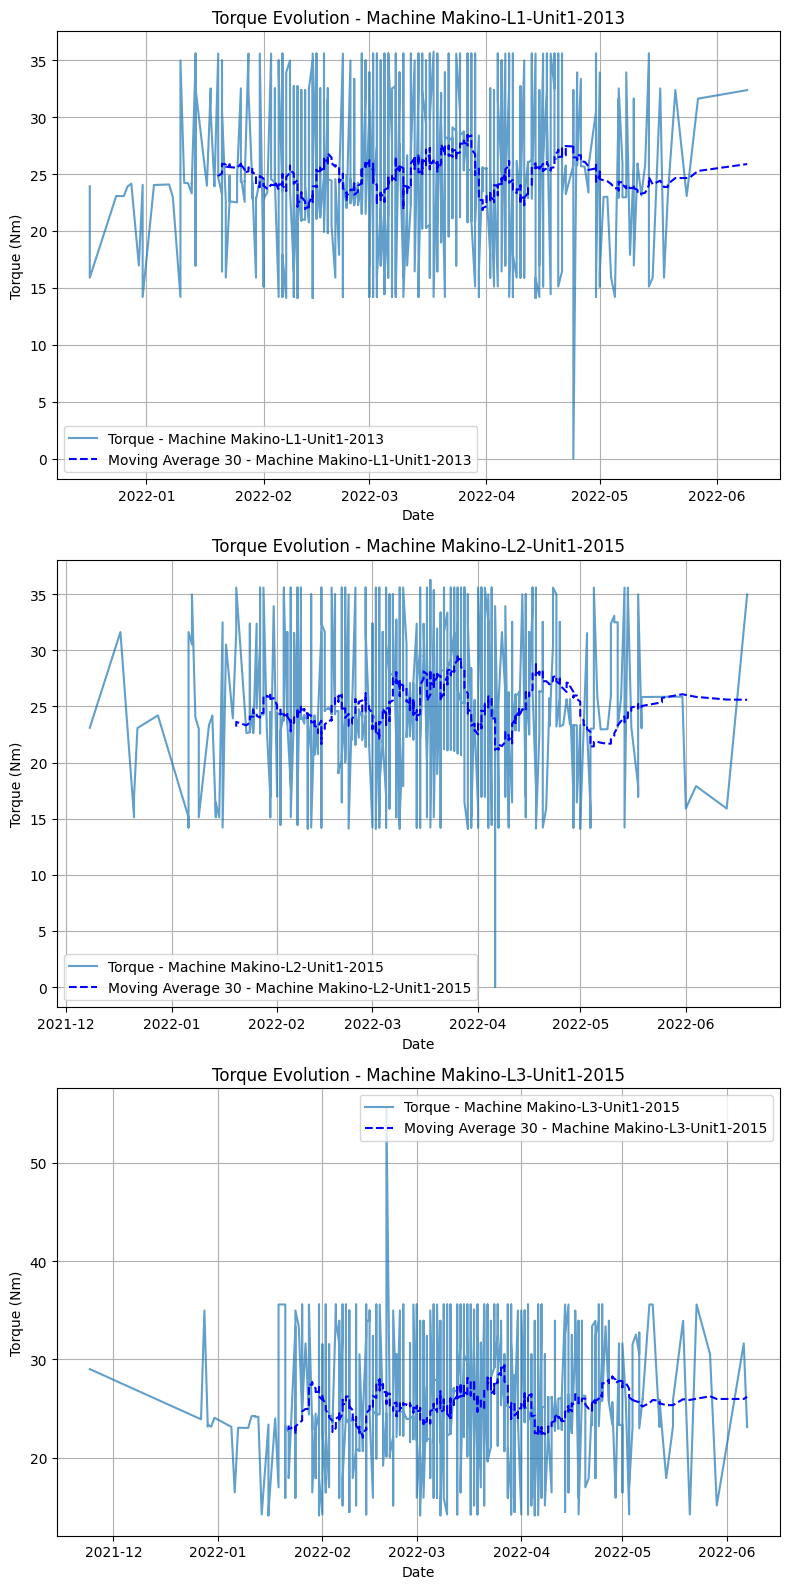

In [44]:
# Sort the dataframe by Machine_ID and Date to ensure temporal order
machine_df = machine_df.sort_values(by=['Machine_ID', 'Date'])

# Get the unique Machine_IDs
unique_machine_ids = machine_df['Machine_ID'].unique()

# Create a figure with 3 subplots (3 rows, 1 column)
fig, axes = plt.subplots(len(unique_machine_ids), 1, figsize=(8, 16))

# Plot the evolution of the Torque for each Machine_ID
for i, machine_id in enumerate(unique_machine_ids):
    # Filter the data for each Machine_ID
    machine_data = machine_df[machine_df['Machine_ID'] == machine_id].copy() 
    
    # Calculate the 30-period moving average
    machine_data.loc[:, 'Torque_MA30'] = machine_data['Torque(Nm)'].rolling(window=30).mean()

    # Plot the evolution of the Torque for this Machine_ID in the corresponding subplot
    axes[i].plot(machine_data['Date'], machine_data['Torque(Nm)'], label=f'Torque - Machine {machine_id}', alpha=0.7)
    axes[i].plot(machine_data['Date'], machine_data['Torque_MA30'], label=f'Moving Average 30 - Machine {machine_id}', color='blue', linestyle='--')
    
    # Add details
    axes[i].set_title(f'Torque Evolution - Machine {machine_id}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Torque (Nm)')
    axes[i].grid(True)
    axes[i].legend()

# Adjust the layout to avoid overlaps
plt.tight_layout()
# Show the graph
plt.show()


As shown above, we can observe the evolution of torque power throughout the dataset. To enhance the visualization and better highlight the trends, I’ve added a 30-point moving average. The moving average smooths the data by calculating the average of the last 30 data points for each observation. This helps to eliminate noise and provides a clearer view of the overall torque trends. 

## Data Summary:
### Calculations:
- **Total Average Torque**: 25.19696044207056

### Interpretation:
- The **Makino-L1-Unit1-2013** machine has an average torque of **24.94 Nm**.
- The **Makino-L2-Unit1-2015** machine has an average torque of **25.12 Nm**.
- The **Makino-L3-Unit1-2015** machine has an average torque of **25.54 Nm**.

### Total Average:
The total average torque across all machines is 25.20 Nm, which suggests that all the machines have similar performance in terms of torque, as their individual averages are close to this value.

## 6. Assembly Line with Highest Machine Downtime

In [45]:
machine_df['Downtime'].unique()

array(['Machine_Failure', 'No_Machine_Failure'], dtype=object)

In [61]:
# Count the number of Machine_Failure and No_Machine_Failure for each Machine_ID
failure_counts = machine_df.groupby(['Machine_ID', 'Downtime']).size().unstack(fill_value=0).reset_index()

# Extract "Makino_L" from the Machine_ID column and update the DataFrame
failure_counts['Machine_ID'] = failure_counts['Machine_ID'].str.extract(r'(Makino-L\d)')

In [59]:
# Calculate statistics for each Machine_ID
total = failure_counts[['Machine_Failure', 'No_Machine_Failure']].sum(axis=1)
failure_counts['Machine_Failure_%'] = (failure_counts['Machine_Failure'] / total) * 100
failure_counts['No_Machine_Failure_%'] = (failure_counts['No_Machine_Failure'] / total) * 100

print(failure_counts)

Downtime Machine_ID  Machine_Failure  No_Machine_Failure  Machine_Failure_%  \
0         Makino-L1              440                 390          53.012048   
1         Makino-L2              382                 381          50.065531   
2         Makino-L3              409                 379          51.903553   

Downtime  No_Machine_Failure_%  
0                    46.987952  
1                    49.934469  
2                    48.096447  


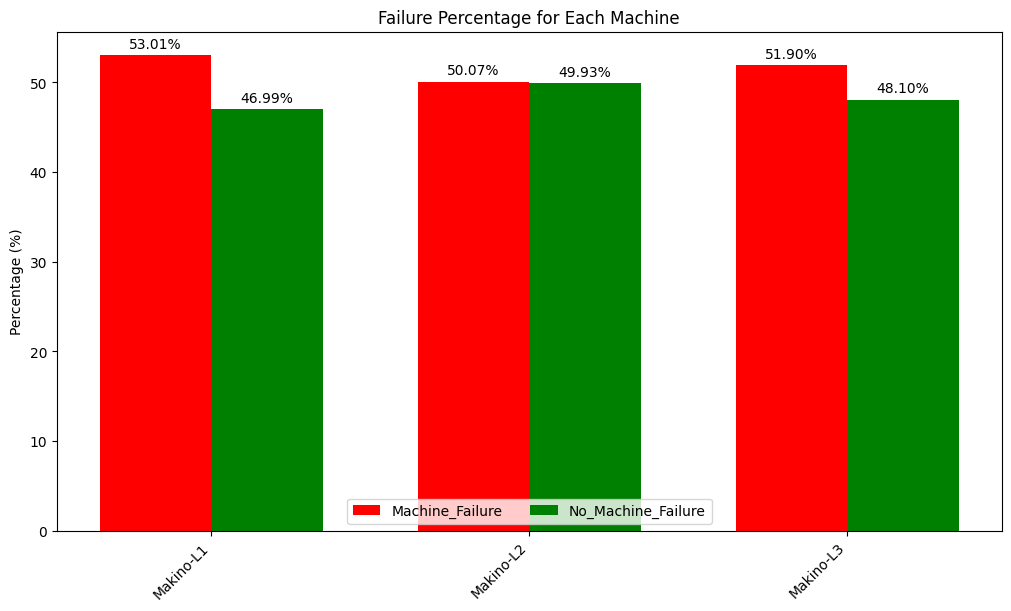

In [60]:
#Display visualisation for better analysis

# Setting the index for Machine_ID
x = np.arange(len(failure_counts['Machine_ID']))  # positions of the bars
width = 0.35  # width of the bars
multiplier = 0

# Creating the figure
fig, ax = plt.subplots(layout='constrained')

# Adjusting the size of the figure (increase the figure size slightly)
fig.set_size_inches(10, 6)  # Adjust the width and height as needed

# Plotting the data for Machine_Failure and No_Machine_Failure in percentage
rects1 = ax.bar(x - width/2, failure_counts['Machine_Failure_%'], width, label='Machine_Failure', color='red')
rects2 = ax.bar(x + width/2, failure_counts['No_Machine_Failure_%'], width, label='No_Machine_Failure', color='green')

# Adding annotations on the bars with the "%" symbol
ax.bar_label(rects1, labels=[f'{v:.2f}%' for v in failure_counts['Machine_Failure_%']], padding=3)
ax.bar_label(rects2, labels=[f'{v:.2f}%' for v in failure_counts['No_Machine_Failure_%']], padding=3)

# Adding labels, title, and adjusting the x-axis ticks
ax.set_ylabel('Percentage (%)')
ax.set_title('Failure Percentage for Each Machine')
ax.set_xticks(x)
ax.set_xticklabels(failure_counts['Machine_ID'], rotation=45, ha='right')

# Adding the legend
ax.legend(loc='lower center', ncols=2)

plt.show()

## Data Analysis: Machine Failure and Downtime

This table provides a breakdown of machine failures and non-failures for three machines (`Makino-L1`, `Makino-L2`, `Makino-L3`). The analysis includes both the absolute counts and percentages for each category.

| Machine_ID | Machine_Failure | No_Machine_Failure | Machine_Failure (%) | No_Machine_Failure (%) |
|------------|-----------------|---------------------|---------------------|------------------------|
| Makino-L1  | 440             | 390                 | 53.01%              | 46.99%                 |
| Makino-L2  | 382             | 381                 | 50.07%              | 49.93%                 |
| Makino-L3  | 409             | 379                 | 51.90%              | 48.10%                 |

### Key Insights:
- **Makino-L1** shows the highest failure rate, with 53.01% of downtime events being machine failures.
- **Makino-L2** has the most balanced ratio, with 50.07% machine failures and 49.93% non-failures.
- **Makino-L3** follows closely, with a failure rate of 51.90%, slightly higher than Makino-L2.

This data highlights that the failure rates across these machines are relatively similar, ranging from 50% to 54%. A deeper investigation into the causes of these failures could help in reducing downtime and improving machine performance.

## 7. Strategic Recommendation

Based on the analysis of machine downtime data, torque measurements, and overall operational patterns across the three assembly lines, several strategic recommendations are proposed to enhance machine reliability, minimize downtime, and boost overall efficiency.

## 7.1. Immediate Actions

### Priority Investigation of Assembly Line 1 (Makino-L1)
Since Assembly Line 1 has the highest downtime rate at 53.01%, it is essential to investigate the root causes of these frequent failures. A comprehensive examination of the specific failure modes for this line is advised. This may involve:

- **Root Cause Analysis**: Conduct a detailed inspection of the machines and systems on Line 1 to ascertain whether the downtime results from mechanical failures, sensor issues, or human error.
- **Component-Level Analysis**: Identify any parts that may be more susceptible to wear and tear. Ensure regular inspections and timely replacements of critical components (e.g., bearings, hydraulic parts, cooling systems).
- **Operational Checks**: Verify that operators on Line 1 adhere to standard procedures and review any operational irregularities that could be contributing to the increased failure rates.

## 7.2. Short-Term Improvements

### Standardization of Maintenance Schedules
In the short term, it is vital to implement a standardized preventive maintenance schedule across all machines based on observed downtime trends.

- **Scheduled Maintenance**: Analyze historical data to identify patterns in machine failures and create maintenance schedules that align with the most frequent failure intervals.
- **Component Monitoring**: Utilize torque data and other performance metrics to detect signs of wear or degradation, ensuring that critical components are inspected before they reach failure points.
- **Training and Documentation**: Standardize maintenance procedures across all three lines to ensure that team members are equipped to address issues consistently and efficiently.

## 7.3. Long-Term Strategy
Implementing predictive maintenance systems is essential based on the data provided, as it should be a key long-term strategy.

- **Develop Early Warning Systems**: Leverage torque variations along with other operational data such as temperature and vibration to create predictive models that can identify anomalies before they result in downtime.
- **Machine Learning Models**: Create machine learning algorithms that can predict potential failures using historical data, enabling proactive measures like timely component replacements.
- **Real-Time Monitoring**: Set up real-time monitoring systems that continuously track machine parameters and send alerts when values stray from the expected range, helping to avoid unexpected breakdowns.

## 7.4. Future Analysis Suggestions

### Deeper Parameter Correlation Study
Future analyses should concentrate on exploring the relationships among various operational parameters (torque, pressure, temperature, vibration) and the frequency of failures.

- **Data Integration**: Merge data from multiple sources (e.g., pressure, temperature, torque) to develop more robust predictive models.
- **Failure Mode Classification**: Apply clustering algorithms to categorize failure types and pinpoint any commonalities among machines or assembly lines.
- **Actionable Insights**: By examining these correlations, predictive maintenance systems can be enhanced for greater accuracy and specificity, offering actionable insights for maintenance teams.

### Extended Time Series Analysis
To gain more detailed insights, it’s crucial to extend the monitoring period beyond the current seven months of analysis.

- **Seasonal Patterns**: Continue gathering data over an entire year to uncover seasonal trends. For instance, fluctuations in temperature or humidity could impact machine performance and lead to specific types of failures.
- **Long-Term Performance Metrics**: A longer monitoring duration will yield more comprehensive baseline data for assessing long-term performance.
- **Impact of External Factors**: Gathering data from various operational cycles (such as shift changes and seasonal fluctuations) allows us to gain a clearer understanding of how external factors influence machine performance and downtime.

## Conclusion
The insights derived from this analysis lay a strong groundwork for enhancing the operational efficiency of the assembly lines. By focusing on immediate corrective measures, standardizing maintenance procedures, and utilizing predictive maintenance strategies, the company can greatly minimize downtime, boost machine reliability, and streamline overall production processes. Expanding the analysis timeframe and deepening correlation studies will further improve the ability to anticipate and avert operational disruptions, leading to sustained enhancements in machine performance and cost-effectiveness.


# Thanks for your attention ! 
